# Conversion of adata objects to Signac objects

In [1]:
.libPaths(c("/home/icb/laura.martens/miniconda3/envs/best_practices/lib/R/library", "/home/icb/laura.martens/miniconda3/envs/signac/lib/R/library"))

In [2]:
# Load R libraries
library(MuData) # to read in adata in R
library(MuDataSeurat)
library(Signac)
library(Seurat)
library(Matrix) #important for sparse matrix handling
library(stringr)

library(EnsDb.Hsapiens.v86)

Warning message:
“package ‘MuData’ was built under R version 4.2.2”
Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.2”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.2.1”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.2.1”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.

In [3]:
fragment_file <- "/lustre/groups/ml01/datasets/projects/20220323_neurips21_bmmc_christopher.lance/multiome/aggr_donors/atac_fragments.tsv.gz"
adata_file <- "/lustre/groups/ml01/code/laura.martens/scATAC_pipelines/src/best_practices/multiome_donor_s4d8_pp_test.h5mu" #"/lustre/groups/ml01/workspace/christopher.lance/mm_best/src/scATAC/muon_data/neurips_qc_filtered_allsamp.h5ad"

## Read in mudata object

In [4]:
atac <- MuDataSeurat::ReadH5MU(adata_file)

Warning message in missing_on_read("/var", paste0("global variables metadata (", :
"Missing on read: /var. Seurat does not support global variables metadata (gene_ids, feature_types, genome, interval)."
Warning message in read_layers_to_assay(h5[["mod"]][[mod]], mod):
"The var_names from modality gene_activity have been renamed as feature names cannot contain '_'. E.g. gene_activity:MIR1302-2HG -> gene-activity:MIR1302-2HG."
as(<dsCMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "generalMatrix") instead

Warning message in missing_on_read(paste0("/mod", mod, "/varp"), "pairwise annotation of variables"):
"Missing on read: /modrna/varp. Seurat does not support pairwise annotation of variables."
Warning message in missing_on_read(paste0("/mod", mod, "/varp"), "pairwise annotation of variables"):
"Missing on read: /modatac/varp. Seurat does not support pairwise annotation of variables."
Warning message in missing_on_read(paste0("/mod", mod, "/varp"), "pairwise annotation 

In [5]:
library(GenomeInfoDb)

[1] "MIR1302-2HG" "FAM138A"     "OR4F5"       "AL627309.1"  "AL627309.3" 
 [6] "AL627309.2"  "AL627309.5"  "AL627309.4"  "AP006222.2"  "AL732372.1"

In [14]:
Assays(atac)

[1] "rna"           "atac"          "gene_activity"

In [27]:
split_assay_names <- function(seurat){
    for(assay in Assays(seurat)){
        rownames(seurat[[assay]]) <- str_split(rownames(seurat[[assay]]), ':', simplify=TRUE)[, 2]
    }
}

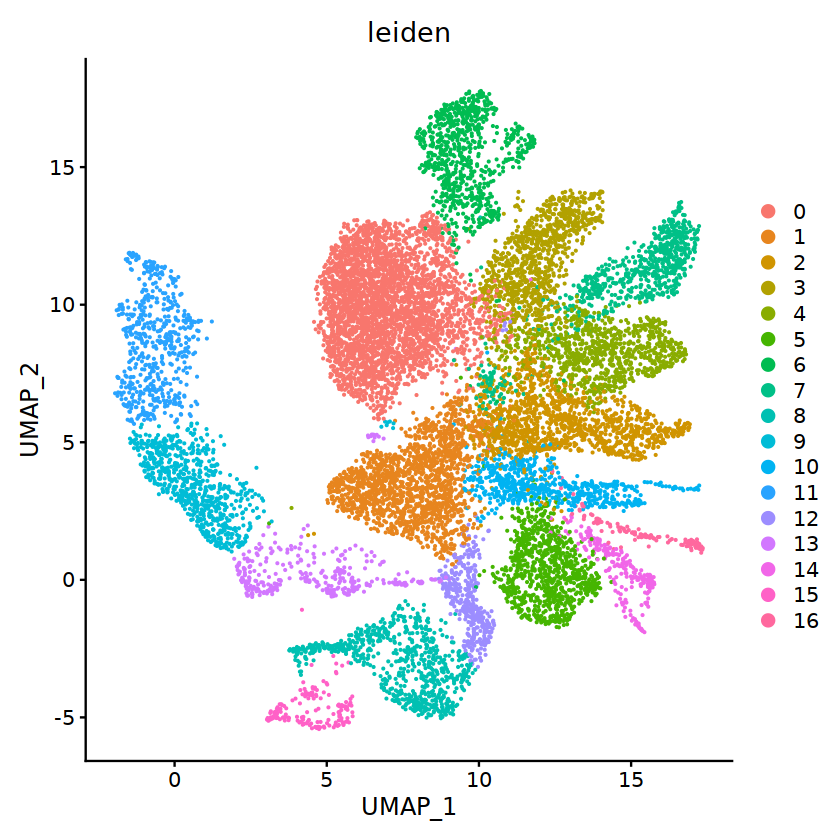

In [36]:
DimPlot(atac, group.by='leiden')

## Convert atac to chromatin assay

In [44]:
new_names <- str_split(rownames(atac[['atac']]@counts), ':', n=1, simplify=TRUE)[, 2]

ERROR: Error in str_split(rownames(atac[["atac"]]@counts), ":", n = 1, simplify = TRUE)[, : subscript out of bounds


In [49]:
rownames(atac[['atac']]) <- str_split(rownames(atac[['atac']]), ':', n=2, simplify=TRUE)[, 2]

ERROR: Error in dimnames(x) <- dn: 'dimnames' applied to non-array


In [38]:
CreateChromatinAssay(counts=)

Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 147102 rows [1, 2, 3, 4,
5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."


ERROR: Error in .get_data_frame_col_as_numeric(df, granges_cols[["end"]]): some values in the "end" column cannot be turned into numeric values


In [10]:
adata <- adata[adata$obs$sample == 's4d8', ]

* Signac has cells on columns peaks as rows
* check separation of var names
* check reference genome
* fragments

In [17]:
atac_norm <- t(adata$X)

In [18]:
colnames(atac_norm) <- adata$obs_names

In [19]:
rownames(atac_norm) <- adata$var_names

In [ ]:
# sparse matrix only works for counts and not data slot...

In [23]:
chrom_assay <- CreateChromatinAssay(
  atac_norm, #normalized counts
  sep = c(":", "-"), #seperator of adata$var_names
  genome = 'hg19', #used reference genome
  fragments = fragment_file
)

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead

Computing hash

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attac

In [24]:
atac <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = adata$obs
)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_”


In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

# add the gene information to the object
Annotation(atac) <- annotations

Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objec

In [36]:

# This part needs to be replaced once I have the correct data from Chris
atac <- RunTFIDF(atac)
atac <- FindTopFeatures(atac, min.cutoff = 'q0')
atac <- RunSVD(atac)

DepthCor(atac)

atac <- RunUMAP(object = atac, reduction = 'lsi', dims = 2:30)

DimPlot(atac)

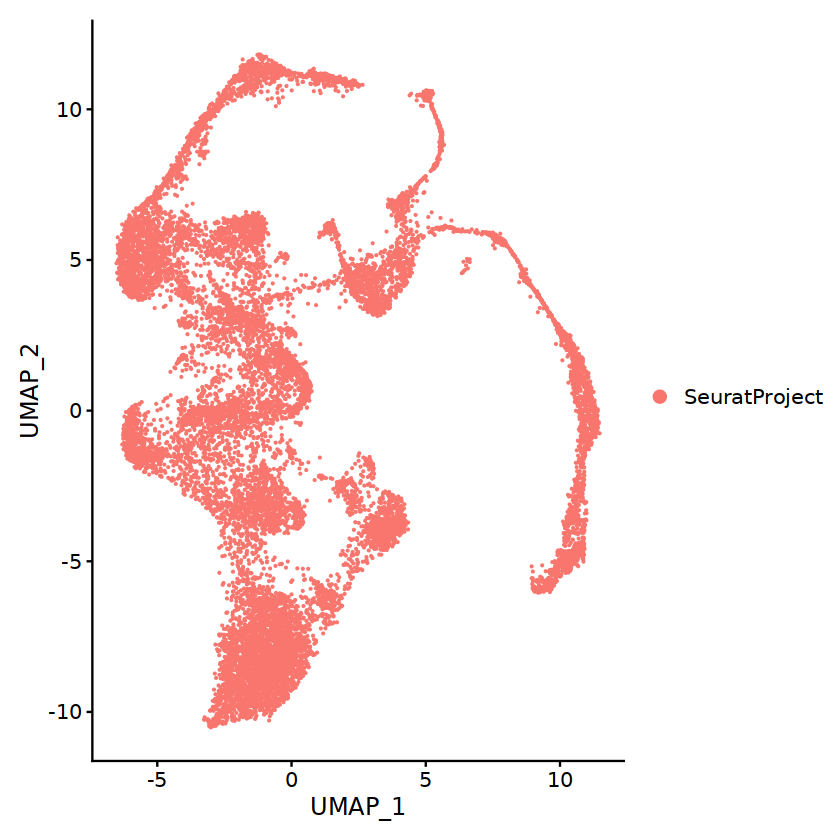

In [42]:
DimPlot(atac)

In [ ]:
cov_plot <- CoveragePlot(
  object = pbmc,
  region = "chr2-87011729-87035519",
  annotation = FALSE,
  peaks = FALSE
)
cov_plot

In [ ]:
8